* Whose customers are churning out to its competitors. 
* You have to analyse the data of your company (Neo) & find insights.
* Stop your customers from churning out to other telecom companies. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

>

# **Data Manipulation:**

In [8]:
# Extract the 5th column & store it in ‘customer_5’ 
customer_5 = df.iloc[:, 4]
customer_5.sample(5)

4532     No
4945    Yes
2204    Yes
5875     No
2808    Yes
Name: Dependents, dtype: object

In [9]:
# Extract the 15th column & store it in ‘customer_15’

customer_15 = df.iloc[:, 14]
customer_15.sample(5)

2823    No internet service
2588                     No
2154    No internet service
3413                    Yes
7042                    Yes
Name: StreamingMovies, dtype: object

In [10]:
# Extract all the male senior citizens whose Payment Method is Electronic check & 
# store the result in ‘senior_male_electronic’

senior_male_electronic = df[(df["gender"] == "Male") & (df["SeniorCitizen"] == 1) & (df["PaymentMethod"] == "Electronic check")]
senior_male_electronic.shape

(298, 21)

In [11]:
# Extract all those customers whose tenure is greater than 70 months or their 
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’ 

customer_total_tenure = df[(df["tenure"] > 70) | (df["MonthlyCharges"] > 100)]
customer_total_tenure.shape

(1259, 21)

In [12]:
# Extract all the customers whose Contract is of two years, payment method is Mailed 
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’ 

two_mail_yes = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]
two_mail_yes.shape

(3, 21)

In [13]:
# Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’ 

customer_333 = df.sample(333)

In [14]:
# Get the count of different levels from the ‘Churn’ column

df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

>

# **Data Visualization**

### Build a **Bar Plot** for the ’InternetService’ column: 
* Set x-axis label to ‘Categories of Internet Service’
* Set y-axis label to ‘Count of Categories’ 
* Set the title of plot to be ‘Distribution of Internet Service’ 
* Set the color of the bars to be ‘orange’ 

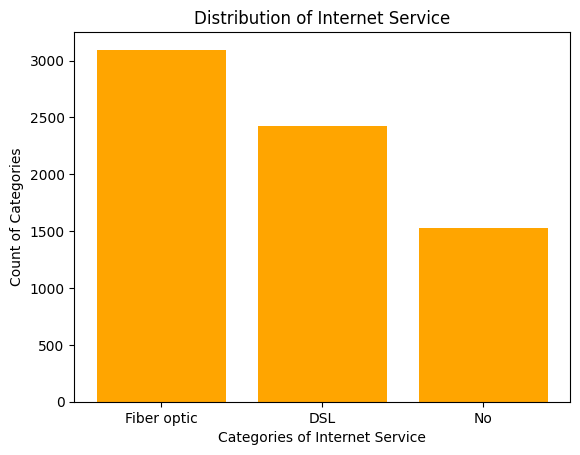

In [15]:
# sns.countplot(x="InternetService",data=df, color="orange")
val = df["InternetService"].value_counts()
plt.bar(val.keys().tolist(), val.tolist(), color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

### Build a **histogram** for the ‘tenure’ column: 
* Set the number of bins to be 30 
* Set the color of the bins  to be ‘green’ 
* Assign the title ‘Distribution of tenure’

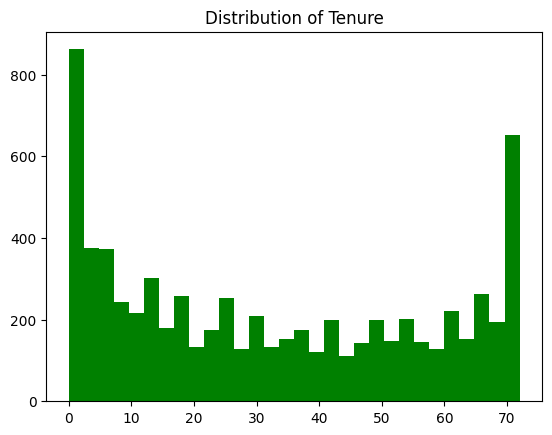

In [16]:
plt.hist(df["tenure"], bins=30, color="green")
plt.title("Distribution of Tenure")
plt.show()

### Build a **Scatter Plot** between ‘MonthlyCharges’ & ‘tenure’. 
* Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:  
* Assign the points a color of ‘brown’
* Set the x-axis label to ‘Tenure of customer’ 
* Set the y-axis label to ‘Monthly Charges of customer’ 
* Set the title to ‘Tenure vs Monthly Charges’ 

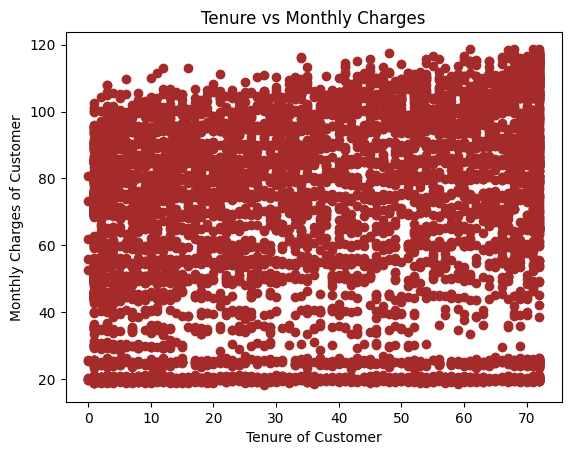

In [17]:
plt.scatter(df["tenure"], df["MonthlyCharges"], color="brown")
plt.xlabel("Tenure of Customer")
plt.ylabel("Monthly Charges of Customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

### Build a **box-plot** between ‘tenure’ & ‘Contract’. 
* Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 

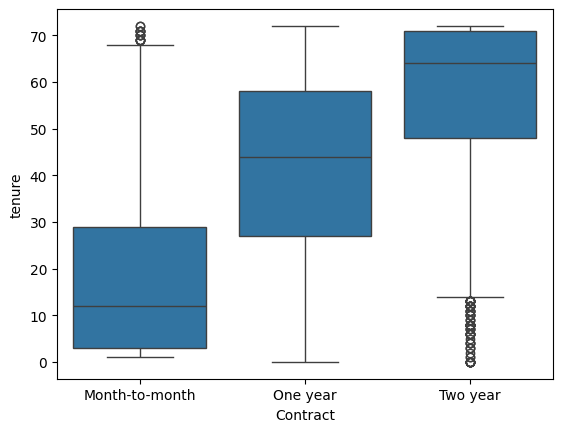

In [18]:
sns.boxplot(x='Contract', y='tenure', data=df)
# df.boxplot(by=['Contract'], column=['tenure'])
plt.show()

>

# **ML Model:**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, accuracy_score, confusion_matrix

>

### **Linear Regression:**

### Build a simple linear model 
* where dependent variable is ‘MonthlyCharges’ and  independent variable is ‘tenure’ 
* Divide the dataset into train and test sets in 70:30 ratio.  
* Build the model on train set and predict the values on test set 
* After predicting the values, find the root mean square error

In [20]:
x = df.loc[:, ["tenure"]]
y = df.loc[:, ["MonthlyCharges"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

In [22]:
root_mean_squared_error(y_test, y_pred)

29.07936015646814

>

### **Logistic Regression:**

### Build a simple logistic regression model 
* where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’ 
* Divide the dataset in 65:35 ratio 
* Build the model on train set and predict the values on test set 
* Build the confusion matrix and get the accuracy score

In [23]:
x = df[["MonthlyCharges"]]
y = df[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
confusion_matrix(y_test, y_pred)

array([[1797,    0],
       [ 669,    0]], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.7287104622871047

### Build a multiple logistic regression model 
* where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’ 
* Divide the dataset in 80:20 ratio 
* Build the model on train set and predict the values on test set 
* Build the confusion matrix and get the accuracy score

In [27]:
x = df[["tenure", "MonthlyCharges"]]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
confusion_matrix(y_test, y_pred)

array([[944,  92],
       [193, 180]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.7977288857345636

>

### **Decision Tree:**

### Build a decision tree model 
* where dependent variable is ‘Churn’ & independent variable is ‘tenure’  
* Divide the dataset in 80:20 ratio 
* Build the model on train set and predict the values on test set 
* Build the confusion matrix and calculate the accuracy 

In [31]:
x = df[["tenure"]]
y = df[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()

dtc_model.fit(x_train, y_train)
y_pred = dtc_model.predict(x_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[951,  85],
       [257, 116]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.7572746628814763

>

### **Random Forest:**

### Build a Random Forest model 
* where dependent variable is ‘Churn’ & independent  variables are ‘tenure’ and ‘MonthlyCharges’ 
* Divide the dataset in 70:30 ratio 
* Build the model on train set and predict the values on test set 
* Build the confusion matrix and calculate the accuracy

In [35]:
x = df[["tenure", "MonthlyCharges"]]
y = df[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
confusion_matrix(y_test, y_pred)

array([[1323,  216],
       [ 305,  269]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

0.7534311405584477